In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_gender_sort=df.sort_values("Gender")
df_gender_sort

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
69,70,Female,32,48,47
96,97,Female,47,60,47
160,161,Female,56,79,35
94,95,Female,32,60,42
93,94,Female,40,60,40
...,...,...,...,...,...
81,82,Male,38,54,55
80,81,Male,57,54,51
77,78,Male,40,54,48
138,139,Male,19,74,10


In [8]:
df_Income_sort=df.sort_values("Annual Income (k$)")
df_Income_sort

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
#df.drop_duplicates() to drop duplicate rows, take transpose and do the same to drop duplicate columns

In [10]:
df_gender=df.groupby('Gender')

In [11]:
df_gender['Age'].mean().sort_values()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [12]:
df_gender['Age'].max()

Gender
Female    68
Male      70
Name: Age, dtype: int64

In [13]:
df_gender['Age'].var()

Gender
Female    159.873150
Male      240.709378
Name: Age, dtype: float64

In [14]:
df_gender['Age'].std()

Gender
Female    12.644095
Male      15.514812
Name: Age, dtype: float64

In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

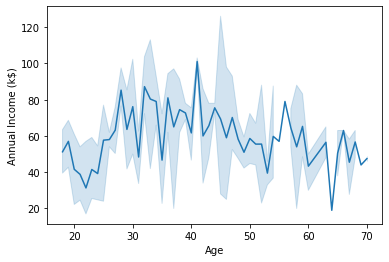

In [16]:
sns.lineplot(x='Age', y='Annual Income (k$)', data=df)
plt.show()

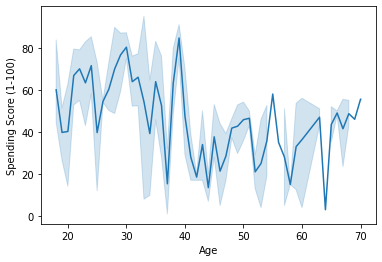

In [17]:
sns.lineplot(x='Age', y='Spending Score (1-100)', data=df)
plt.show()

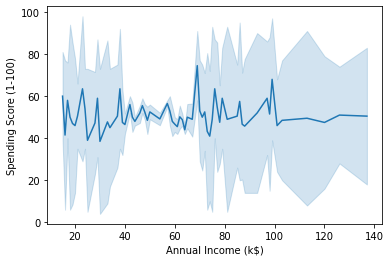

In [18]:
sns.lineplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

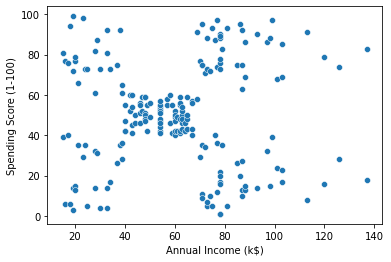

In [19]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

In [20]:
X=df.iloc[:,[3,4]].values

In [21]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


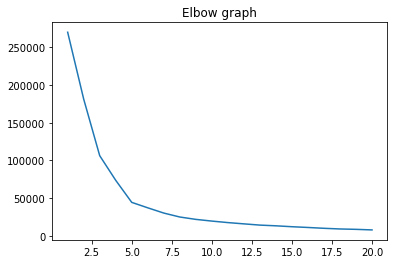

In [22]:
wcss=[]
K=[]
j=0
for i in range(1,21):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=45)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    j+=1
    K.append(j)
sns.lineplot(x=K, y=wcss)
plt.title('Elbow graph')
plt.show()

In [23]:
# Optimal no. of clusters is 5.

In [24]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(X)
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [25]:
hor_axis=[]
ver_axis=[]
for i in range(200):
    hor_axis.append(X[i][0])
    ver_axis.append(X[i][1])

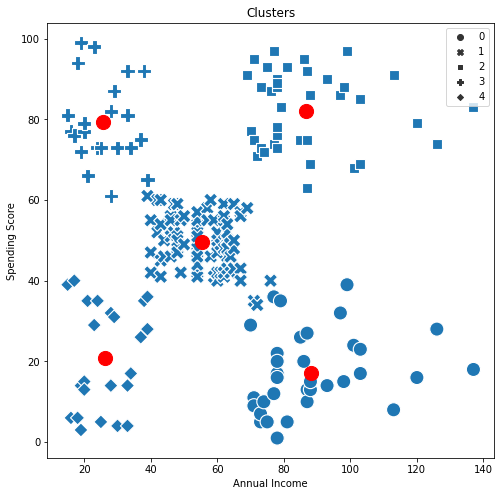

In [26]:
plt.figure(figsize=(8,8))
plt.title('Clusters')
sns.scatterplot(x=hor_axis, y=ver_axis, style=Y, s=200)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red' )
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()